In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

# fix the current import path
import sys, os
cwd = os.getcwd()
cdir = os.path.abspath(os.path.join(cwd,".."))
sys.path.insert(0, cdir)

# import all kind of stuff
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from twophase import plot_antenna_pattern, plot_benefit,coverage,polarunion,interf_benefit,plot_telos_pattern
from twophase import plot_interf_benefit, compute_directional_benefit, compute_directional_benefit
from twophase import compute_isotropy, testbed_directional_benefit
from ingest_ab import process_file
from directional_benefit import plot_directional_benefit
from temporalanalysis.temporal_analysis_ab import compute_phase_matrix, plot_phase_matrix
from utils import file_for_node
from spatialreuse import testbed_index_rssi, compute_spatial_reuse_for_antenna

# setup matplotlib parameters
import matplotlib
matplotlib.matplotlib_fname()
matplotlib.rcParams['lines.linewidth'] = 2
matplotlib.rcParams['savefig.bbox'] = 'tight'
matplotlib.rcParams['legend.numpoints'] = 1
matplotlib.rcParams['font.size'] = 18
matplotlib.rcParams['legend.fontsize'] = 12

In [2]:
# load the data 
telosb_df = {}
for node in range(16):
    #motea_antm_df[node] = pd.DataFrame.from_csv('/Users/ochipara/Working/DirectionalAntennas/data/testbed/antennapatterns/MoteD_AntennaM/2016-09-24_NODE%d.csv' % node)
    telosb_df[node] = pd.DataFrame.from_csv('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/TelosB/2016-09-25_NODE%d.csv' % node)


In this section, we will explore the impact of changing the two phases has on the antenna patterns. The experiment involves rotating the mote and measuring its rx. We have also for tx.

# Impact of Antenna Configurations

-86 -52
-86 -52
-86 -52
-86 -52
-86 -52


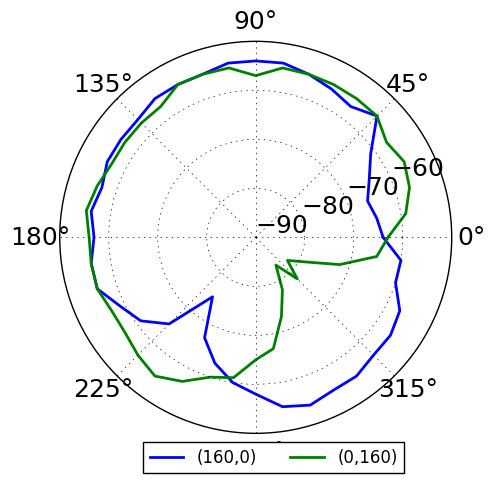

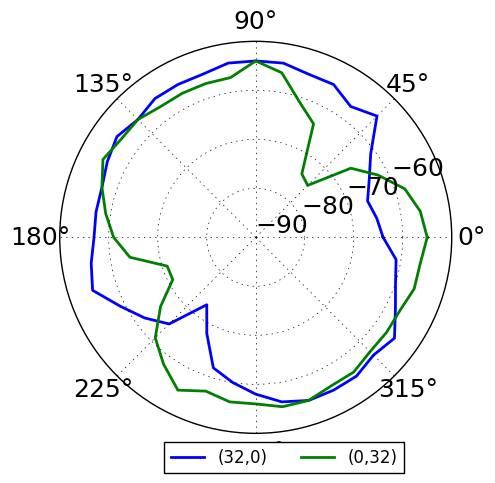

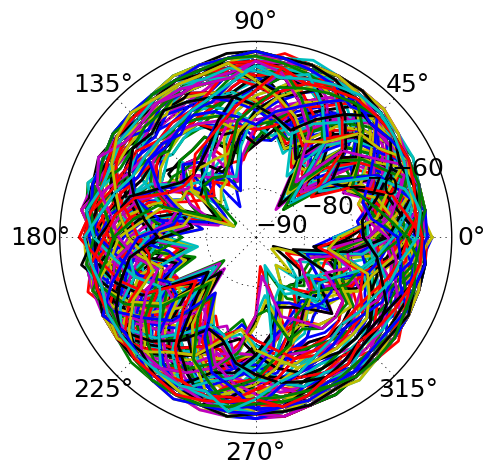

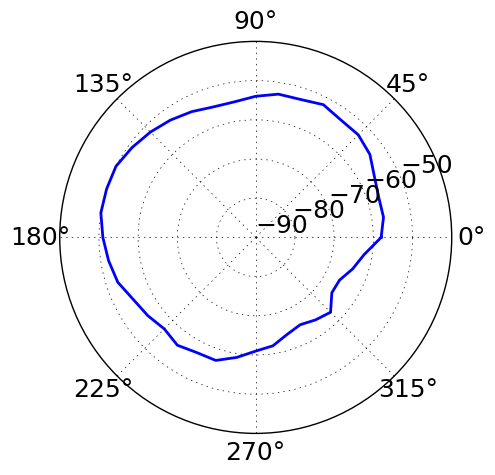

In [3]:
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM/2016-09-24_NODE1.csv'
df = pd.DataFrame.from_csv(fn)

fig = plot_antenna_pattern(df, phase1_range=[160], phase2_range=[0])[0]
plot_antenna_pattern(df, phase1_range=[0], phase2_range=[160], figure=fig)
plt.legend(['(160,0)', '(0,160)'],ncol=2,bbox_to_anchor=(.9, 0))
plt.ylim(-90,-50)
plt.yticks(np.arange(-90,-50,10))
plt.savefig('figures/tx_motea_antm_0_160.pdf', bbox_inches='tight')

fig = plot_antenna_pattern(df, phase1_range=[32], phase2_range=[0])[0]
plot_antenna_pattern(df, phase1_range=[0], phase2_range=[32], figure=fig)
plt.legend(['(32,0)', '(0,32)'],ncol=2,bbox_to_anchor=(.9, 0))
plt.ylim(-90,-50)
plt.yticks(np.arange(-90,-50,10))
plt.savefig('figures/tx_motea_antm_0_32.pdf', bbox_inches='tight')

matplotlib.rcParams['lines.linewidth'] = 1
fig,pairs = plot_antenna_pattern(df, phase1_range=np.arange(0,256), phase2_range=np.arange(0,256))
plt.ylim(-90,-50)
plt.yticks(np.arange(-90,-50,10))
plt.savefig('figures/tx_motea_antm_all.pdf', bbox_inches='tight')
matplotlib.rcParams['lines.linewidth'] = 2

fig = plot_telos_pattern(telosb_df[0])
plt.ylim(-90,-40)
plt.yticks(np.arange(-90,-40,10))
plt.savefig('figures/tx_telosb.pdf')


-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52
-86 -52


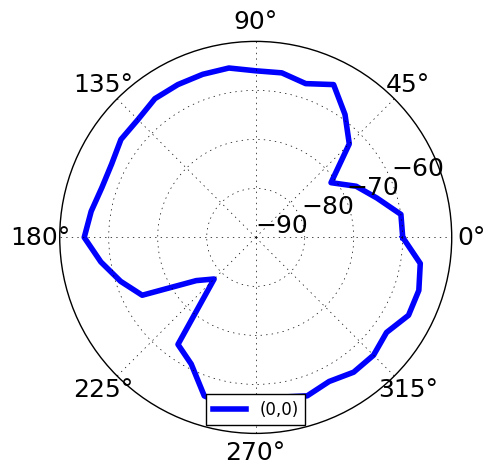

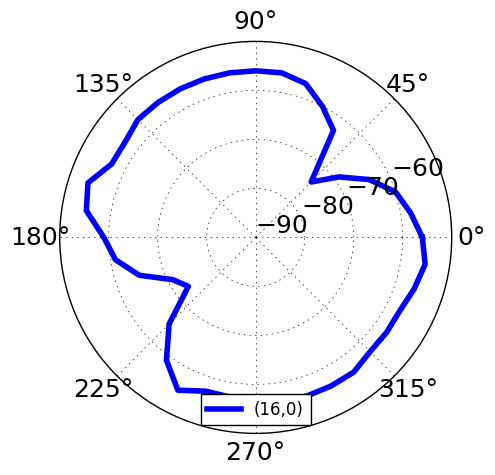

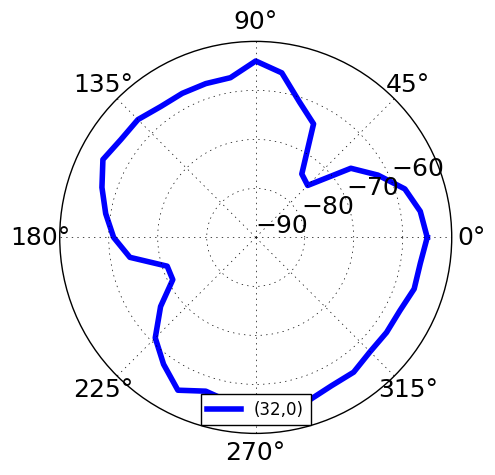

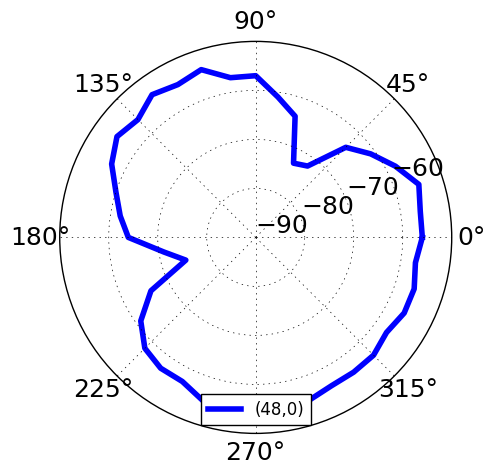

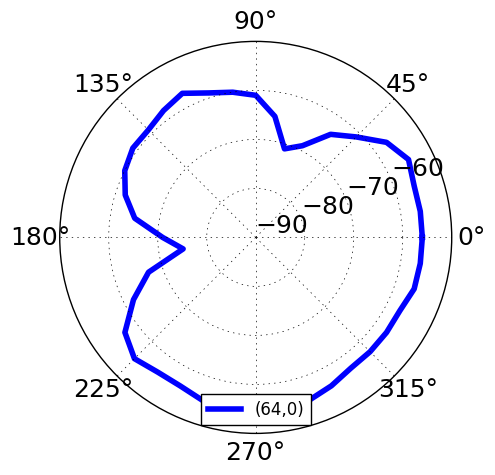

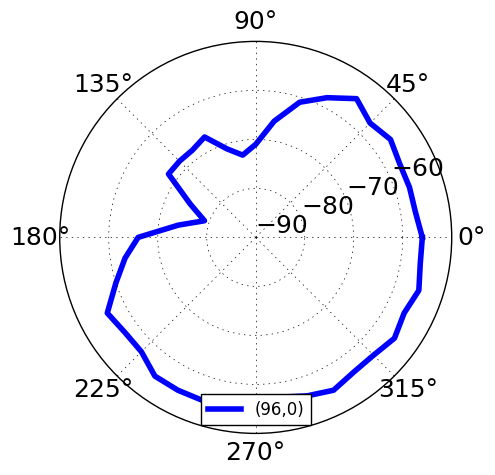

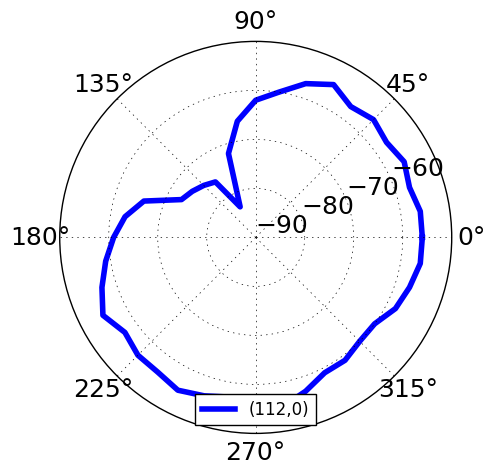

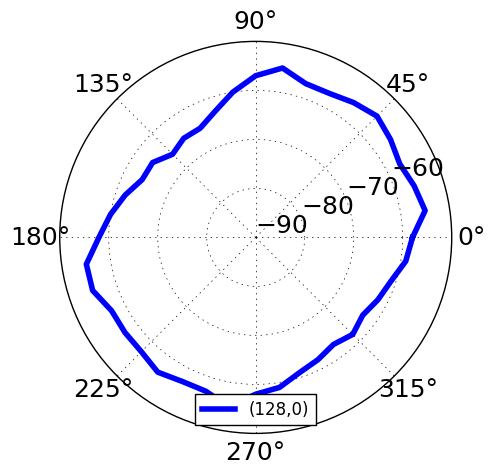

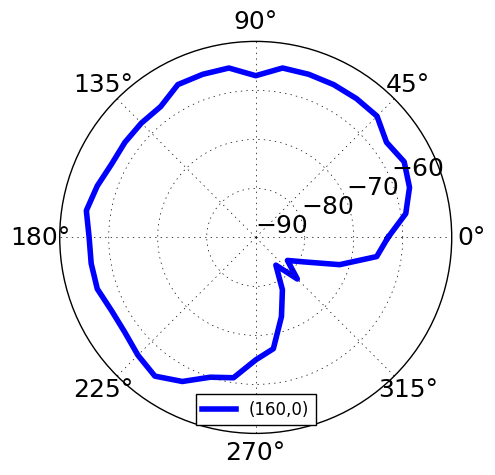

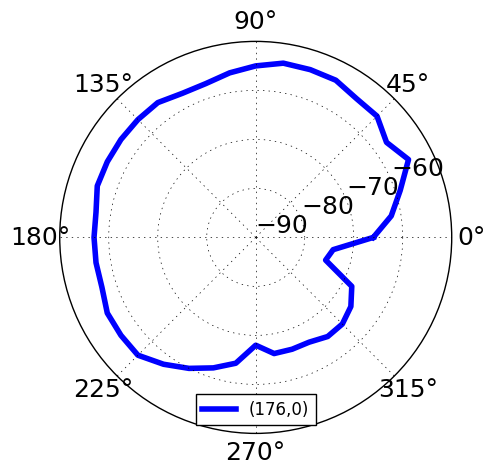

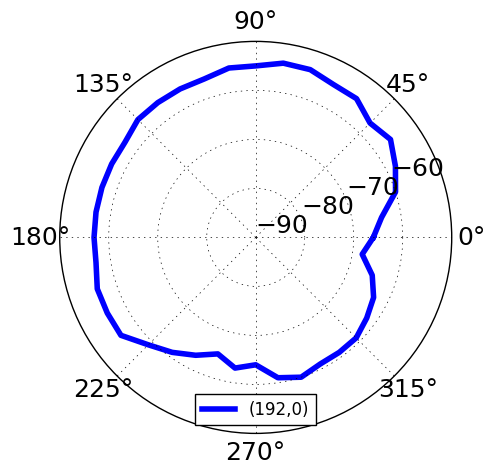

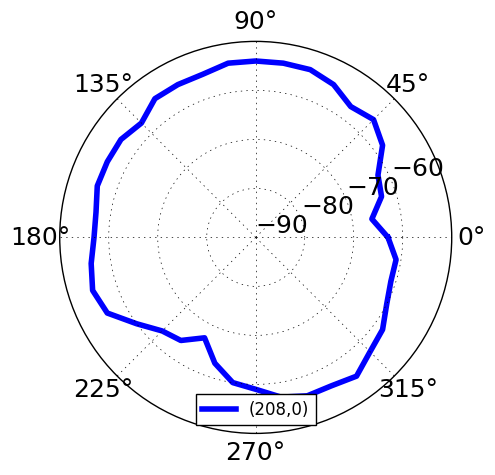

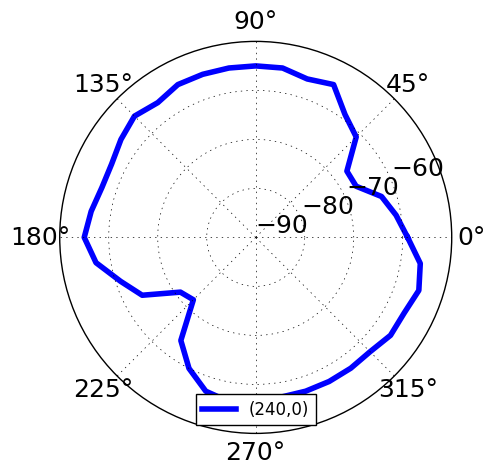

In [4]:
phases = np.unique(df.phase)
for phase in phases:
    f = plt.figure()
    plot_antenna_pattern(df, phase1_range=[0], phase2_range=[phase], lw=4, figure=f)
    plt.ylim(-90,-50)
    plt.yticks(np.arange(-90,-50,10))
    plt.legend(['(%d,0)' % (phase)], loc='lower center')
    plt.savefig('figures/indoors/tx_moted_antm_0_%d.pdf' % phase)

-86 -52
-86 -52


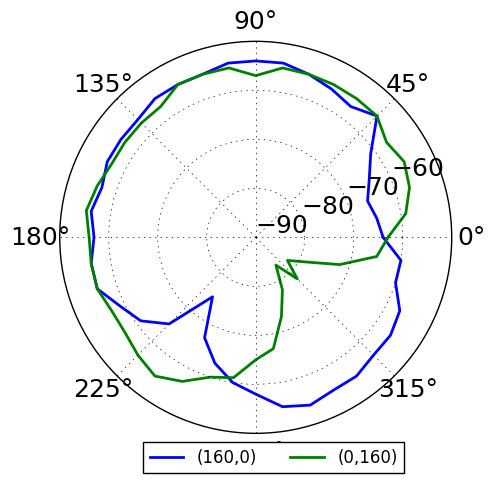

In [5]:
fig = plot_antenna_pattern(df, phase1_range=[160], phase2_range=[0])[0]
plot_antenna_pattern(df, phase1_range=[0], phase2_range=[160], figure=fig)
plt.legend(['(160,0)', '(0,160)'],ncol=2,bbox_to_anchor=(.9, 0))
plt.ylim(-90,-50)
plt.yticks(np.arange(-90,-50,10))
plt.savefig('figures/tx_motea_antm_0_160.pdf', bbox_inches='tight')


The above figure captures the impact of both changing the orientation of the transmitter as well as that of changing the antenna configuration. When the antenna is configuration is fixed, PHASER behaves like an omnidirectional antenna that creates a non-isotropic radtion pattern. However, in contrast to unidirectional anntenas, PHASER can modify its antenna configuration to create different radiation pattern. Figures 1, plots the radition pattern when antenna is configurated with phases (0, 32) and (32, 0). The antenna pattern (0, 32) (depicted in blue) clearly is non-uniform clearly showing higher RSSI vales towards the top of the figure. In contrast, the radiation pattern for (32, 0) (depecicted in green) creates a significantly different radiation pattern. 

[relative to telosB, the radiation pattern is more non-uniform] 

**Result:** Changing the phases of the antenna creates different radiation patterns. 

By looking at Figure 1a) it is easy to note that the two shown radiation patterns have a symmetry around the x axis. In a perfect environment, we would expect that such a radiation pattern exists. However, indoors where there is a significant impact of multi-path this does not hold. For example, Figure 1b) does not show the same symmetry. This suggests that changing the phases of the antenna has an asymmetric behavior.

**Result:** Changing the phases of two output signals does not result in symmetric radiation patterns indoors due to multi-path effects.


** Result:** Using multiple configuration, we can create a radiation pattern that is more isotropic than any single antenna configuration.

** TODO **: How does this look outdoors


98 107


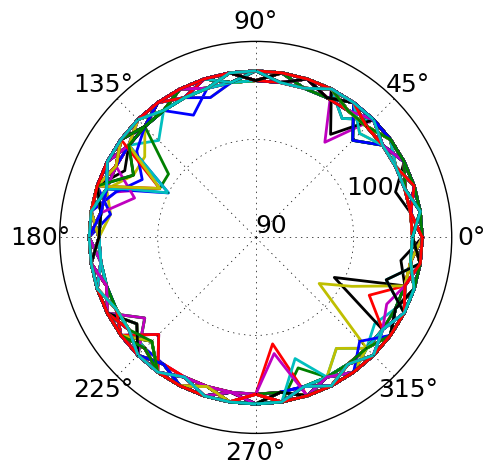

In [6]:
fig,pairs = plot_antenna_pattern(df, phase1_range=np.arange(0,256), phase2_range=np.arange(0,256), metric='lqi')
plt.ylim(90,110)
plt.yticks(np.arange(90, 110, 10))
plt.savefig('figures/tx_motea_antm_all.pdf', bbox_inches='tight')

# Directional benefit

In [7]:
moteA_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM/2016-09-24_NODE', 'MoteA-AntennaM')
moteB_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaM/2016-09-24_NODE', 'MoteB-AntennaM')
moteC_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaM/2016-09-24_NODE', 'MoteC-AntennaM')
moteD_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaM/2016-09-24_NODE', 'MoteD-AntennaM')
moteE_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaM/2016-09-27_NODE', 'MoteE-AntennaM')
moteF_antM_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaM/2016-09-27_NODE', 'MoteF-AntennaM')

[ 0.          0.15707963  0.31415927  0.4712389   0.62831853  0.78539816
  0.9424778   1.09955743  1.25663706  1.41371669  1.57079633  1.72787596
  1.88495559  2.04203522  2.19911486  2.35619449  2.51327412  2.67035376
  2.82743339  2.98451302  3.14159265  3.29867229  3.45575192  3.61283155
  3.76991118  3.92699082  4.08407045  4.24115008  4.39822972  4.55530935
  4.71238898  4.86946861  5.02654825  5.18362788  5.34070751  5.49778714
  5.65486678  5.81194641  5.96902604  6.12610567]
stats= 13 32 24.05


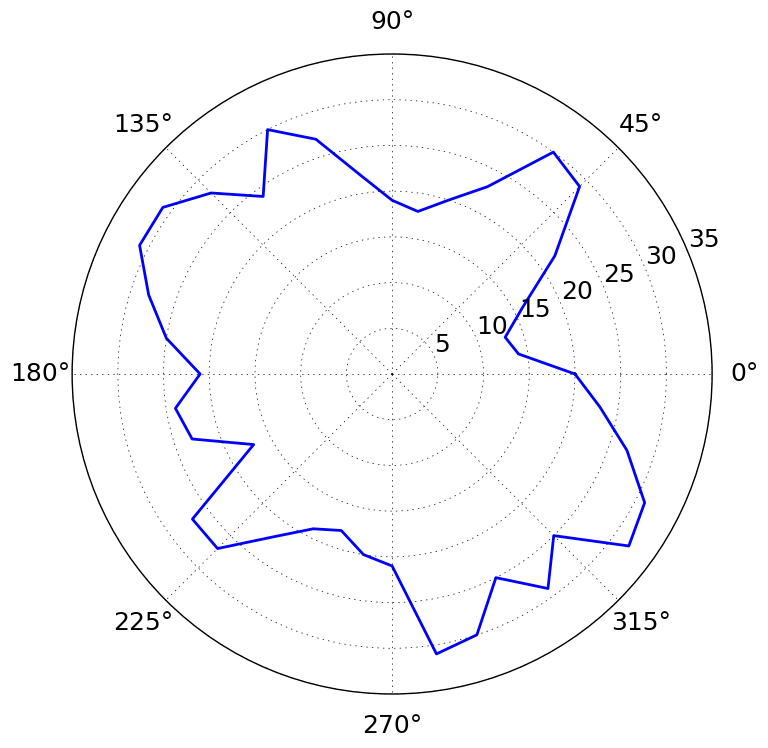

In [18]:
plot_directional_benefit(moteA_antM_benefit['MoteA-AntennaM-node1'])
x = moteA_antM_benefit['MoteA-AntennaM-node1'].benefit
print('stats=', min(x), max(x), np.mean(x))
#plt.plot(angles / 200 * 2 * np.pi, inner)
plt.savefig('figures/directional_benefit/directional_benefit_moteA-antennaM-node1.pdf')

angle  benefit
0       0       20
1       5       14
2      10       13
3      15       16
4      20       22
5      25       29
6      30       30
7      35       23
8      40       20
9      45       18
10     50       19
11     55       22
12     60       27
13     65       30
14     70       24
15     75       28
16     80       31
17     85       31
18     90       28
19     95       25
20    100       21
21    105       24
22    110       23
23    115       17
24    120       27
25    125       27
26    130       22
27    135       19
28    140       18
29    145       20
30    150       21
31    155       31
32    160       30
33    165       25
34    170       29
35    175       25
36    180       32
37    185       31
38    190       27
39    195       23

In [19]:
yA_antM = [np.mean(v.benefit) for v in moteA_antM_benefit.values()]
yB_antM = [np.mean(v.benefit) for v in moteB_antM_benefit.values()]
yC_antM = [np.mean(v.benefit) for v in moteC_antM_benefit.values()]
yD_antM = [np.mean(v.benefit) for v in moteD_antM_benefit.values()]
yE_antM = [np.mean(v.benefit) for v in moteE_antM_benefit.values()]
yF_antM = [np.mean(v.benefit) for v in moteF_antM_benefit.values()]

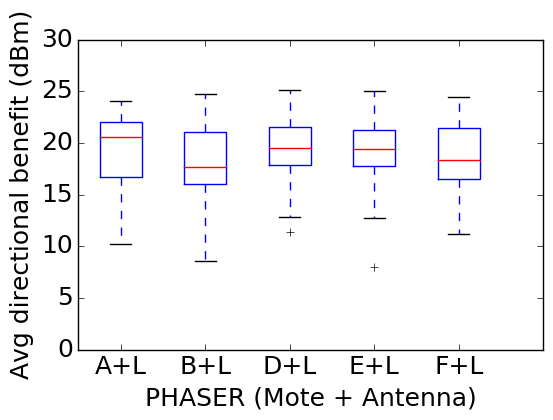

In [44]:
plt.figure()
plt.bar(np.arange(16) + .25 * 0, yA_antM, .25)
plt.bar(np.arange(16) + .25 * 1, yB_antM, .25, color='r')
plt.bar(np.arange(16) + .25 * 2, yD_antM, .25, color='g')
plt.ylabel('Avg directional benefit (dBm)')
plt.xlabel('Receiver (ID)')
plt.legend(['A+L', 'B+L', 'D+L'])
plt.xticks(np.arange(16) + .25 * 3/2, np.arange(16))
plt.ylim(0, 38)
plt.savefig('figures/directional_benefit/directional_benefit_bar.pdf')

plt.figure()
data = [yA_antM, yB_antM, yD_antM, yE_antM, yF_antM]
box = plt.boxplot(data)
plt.xticks(np.arange(1,7), ['A+L', 'B+L', 'D+L', 'E+L', 'F+L'])
#plt.setp(box['boxes'][5], color='r')
plt.ylabel('Avg directional benefit (dBm)')
plt.xlabel('PHASER (Mote + Antenna)')
plt.ylim(0,30)
plt.savefig('figures/directional_benefit/directional_benefit_antM.pdf')

In [43]:
moteA_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaS/2016-10-10_NODE', 'MoteA-AntennaS')
moteB_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaS/2016-10-10_NODE', 'MoteB-AntennaS')
moteC_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaS/2016-10-10_NODE', 'MoteC-AntennaS')
moteD_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaS/2016-10-10_NODE', 'MoteD-AntennaS')
moteE_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaS/2016-10-10_NODE', 'MoteE-AntennaS')
moteF_antS_benefit = testbed_directional_benefit('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaS/2016-10-10_NODE', 'MoteF-AntennaS')

In [40]:
yA_antS = [np.mean(v.benefit) for v in moteA_antS_benefit.values()]
yB_antS = [np.mean(v.benefit) for v in moteB_antS_benefit.values()]
yC_antS = [np.mean(v.benefit) for v in moteC_antS_benefit.values()]
yD_antS = [np.mean(v.benefit) for v in moteD_antS_benefit.values()]
yE_antS = [np.mean(v.benefit) for v in moteE_antS_benefit.values()]
yF_antS = [np.mean(v.benefit) for v in moteF_antS_benefit.values()]

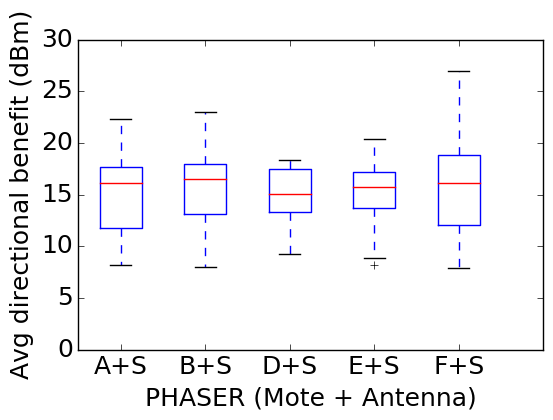

In [41]:
plt.figure()
data = [yA_antS, yB_antS, yD_antS, yE_antS, yF_antS]
box = plt.boxplot(data)
plt.xticks(np.arange(1,7), ['A+S', 'B+S', 'D+S', 'E+S', 'F+S'])
#plt.setp(box['boxes'][5], color='r')
plt.ylabel('Avg directional benefit (dBm)')
plt.xlabel('PHASER (Mote + Antenna)')
plt.ylim(0,30)
plt.savefig('figures/directional_benefit/directional_benefit_antS.pdf')

# Spatial Reuse

Given a receiver placed a physical angle $\phi_R$, we say that an node that may be placed at $\phi_S$ may be reused when 

$$
RSSI_{dB}(\phi_R) - RSSI_{dB}(\phi_S) > th
$$

In [71]:
fn = '/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM/2016-09-24_NODE1.csv'
node0_antm_df = pd.DataFrame.from_csv(fn)

[node0_antm_ibenfit, node0_antm_iconfig] = interf_benefit(node0_antm_df)
np.mean(list(node0_antm_ibenfit.values()))
fig = plot_interf_benefit(node0_antm_ibenfit, 0)
(sender_rssi, interf_rssi, phase1, phase2) = node0_antm_iconfig['0-45']
plt.savefig('figures/spatialreuse/sri_recv0deg.pdf')

plt.figure()
plot_antenna_pattern(node0_antm_df, phase1_range=[phase1], phase2_range=[phase2])
plt.ylim(-90,-50)
plt.yticks(np.arange(-90,-50,10))
plt.plot([0, 0], [-90, -50], 'k-', linewidth=3)
plt.plot([0, np.pi / 2], [-90, -50], 'k-', linewidth=3)
plt.text(-0.01, -54, 'R', bbox=dict(facecolor='red'), fontsize=16)
plt.text((92 / 360) * np.pi * 2, -52, 'P', bbox=dict(facecolor='g'), fontsize=16)
plt.savefig('figures/spatialreuse/sri_recv0deg_pattern.pdf')


-86 -52


In [66]:
moteA_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM/', '2016-09-24_NODE')
moteB_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaM/', '2016-09-24_NODE')
moteC_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaM/', '2016-09-24_NODE')
moteD_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaM/', '2016-09-24_NODE')
moteE_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaM/', '2016-09-27_NODE')
moteF_antM_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaM/', '2016-09-27_NODE')



In [46]:
moteA_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaS/', '2016-10-10_NODE')
moteB_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaS/', '2016-10-10_NODE')
moteC_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaS/', '2016-10-10_NODE')
moteD_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaS/', '2016-10-10_NODE')
moteE_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaS/', '2016-10-10_NODE')
moteF_antS_index = testbed_index_rssi('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaS/', '2016-10-10_NODE')

In [47]:
angles = np.arange(0, 200, 5)
phases = np.arange(0, 256, 32)

moteA_coverage = {}
moteB_coverage = {}
moteC_coverage = {}
moteD_coverage = {}
moteE_coverage = {}
moteF_coverage = {}

moteA_S_coverage = {}
moteB_S_coverage = {}
moteC_S_coverage = {}
moteD_S_coverage = {}
moteE_S_coverage = {}
moteF_S_coverage = {}
for node in range(16):
    moteA_coverage[node] = compute_spatial_reuse_for_antenna(moteA_antM_index[node], angles, phases, 6)[0]
    moteB_coverage[node] = compute_spatial_reuse_for_antenna(moteB_antM_index[node], angles, phases, 6)[0]
    moteC_coverage[node] = compute_spatial_reuse_for_antenna(moteC_antM_index[node], angles, phases, 6)[0]
    moteD_coverage[node] = compute_spatial_reuse_for_antenna(moteD_antM_index[node], angles, phases, 6)[0]
    moteE_coverage[node] = compute_spatial_reuse_for_antenna(moteE_antM_index[node], angles, phases, 6)[0]
    moteF_coverage[node] = compute_spatial_reuse_for_antenna(moteF_antM_index[node], angles, phases, 6)[0]
    
    moteA_S_coverage[node] = compute_spatial_reuse_for_antenna(moteA_antS_index[node], angles, phases, 6)[0]
    moteB_S_coverage[node] = compute_spatial_reuse_for_antenna(moteB_antS_index[node], angles, phases, 6)[0]
    moteC_S_coverage[node] = compute_spatial_reuse_for_antenna(moteC_antS_index[node], angles, phases, 6)[0]
    moteD_S_coverage[node] = compute_spatial_reuse_for_antenna(moteD_antS_index[node], angles, phases, 6)[0]
    moteE_S_coverage[node] = compute_spatial_reuse_for_antenna(moteE_antS_index[node], angles, phases, 6)[0]
    moteF_S_coverage[node] = compute_spatial_reuse_for_antenna(moteF_antS_index[node], angles, phases, 6)[0]




In [48]:
plt.figure()
#plt.bar(np.arange(16), [moteA_coverage[y] for y in range(16)], .25)
cA = [moteA_coverage[y] for y in range(16)]
cB = [moteB_coverage[y] for y in range(16)]
cC = [moteC_coverage[y] for y in range(16)]
cD = [moteD_coverage[y] for y in range(16)]
cE = [moteE_coverage[y] for y in range(16)]
cF = [moteF_coverage[y] for y in range(16)]

cAS = [moteA_S_coverage[y] for y in range(16)]
cBS = [moteB_S_coverage[y] for y in range(16)]
cCS = [moteC_S_coverage[y] for y in range(16)]
cDS = [moteD_S_coverage[y] for y in range(16)]
cES = [moteE_S_coverage[y] for y in range(16)]
cFS = [moteF_S_coverage[y] for y in range(16)]

plt.bar(np.arange(16) + .25 * 0, cA, .25)
plt.bar(np.arange(16) + .25 * 1, cB, .25, color='r')
plt.bar(np.arange(16) + .25 * 2, cF, .25, color='g')
plt.ylabel('Spatial reuse (%)')
plt.xlabel('Receiver (ID)')
plt.legend(['A+L', 'B+L', 'D+L'], ncol=3)
plt.xticks(np.arange(16) + .25 * 3/2, np.arange(16))
plt.ylim(0, 110)
plt.savefig('figures/spatialreuse/spatialreuse_nodes_antM.pdf')


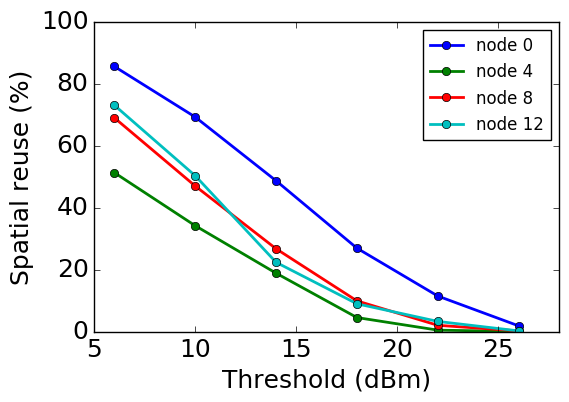

In [49]:
for node in np.arange(0,16,4):
    y = []
    for dist in np.arange(6, 30, 4):
        y.append(compute_spatial_reuse_for_antenna(moteA_antM_index[node], angles, phases, dist)[0])
    plt.plot(np.arange(6, 30, 4), y, 'o-')

plt.ylabel('Spatial reuse (%)')
plt.xlabel('Threshold (dBm)')
plt.ylim(0, 100)
plt.xlim(5, 28)
plt.legend(['node %d' % node for node in np.arange(0,16,4)])
plt.savefig('figures/spatialreuse/spatialreuse_threshold_antM.pdf')



In [75]:
plt.figure()
data = [cA, cB, cD, cE, cF]
box = plt.boxplot(data)
plt.xticks(np.arange(1,7), ['A+M', 'B+M', 'D+M', 'E+M', 'F+M'])
#plt.setp(box['boxes'][5], color='r')
plt.ylim(0,100)
plt.ylabel('Spatial reuse (th=6dBm)')
plt.xlabel('Antenna prototype (ID)')
plt.savefig('figures/spatialreuse/spatialreuse_antM.pdf')

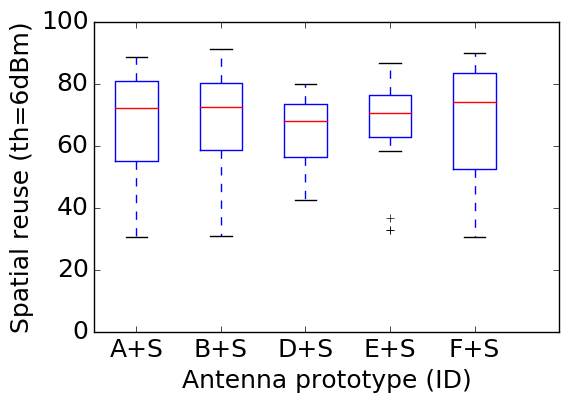

In [73]:
plt.figure()
data = [cAS, cBS, cDS, cES, cFS]
box = plt.boxplot(data)
plt.xticks(np.arange(1,7), ['A+S', 'B+S', 'D+S', 'E+S', 'F+S'])
#plt.setp(box['boxes'][5], color='r')
plt.ylim(0,100)
plt.ylabel('Spatial reuse (th=6dBm)')
plt.xlabel('Antenna prototype (ID)')
plt.savefig('figures/spatialreuse/spatialreuse_antS.pdf')

# Other

In [ ]:
phase_matrix_fn = {}
node = 0
phase_matrix_fn['moteA_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM', node)
phase_matrix_fn['moteB_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaM', node)
phase_matrix_fn['moteC_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaM', node)
phase_matrix_fn['moteD_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaM', node)
phase_matrix_fn['moteE_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaM', node)
phase_matrix_fn['moteF_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaM', node)

#phase_matrix_fn['moteA_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaS', node)
phase_matrix_fn['moteB_antennaS'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteB_AntennaS', node)
# phase_matrix_fn['moteC_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteC_AntennaS', node)
# phase_matrix_fn['moteD_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteD_AntennaS', node)
#phase_matrix_fn['moteE_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteE_AntennaS', node)
#phase_matrix_fn['moteF_antennaM'] = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteF_AntennaS', node)


phase_matrix = {}
for k in phase_matrix_fn:
    df = pd.DataFrame.from_csv(phase_matrix_fn[k])
    phase_matrix[k] = compute_phase_matrix(df, metric='rssi_avg')

In [ ]:
for k in phase_matrix:
    plt.figure()
    plot_phase_matrix(phase_matrix[k])
    plt.savefig('figures/phase_matrix_%s.pdf' % k)
    

In [ ]:
for node in range(16):
    fn = file_for_node('/Users/ochipara/Working/DirectionalAntennas/data/testbed/tx_patterns/MoteA_AntennaM', node)
    df = pd.DataFrame.from_csv(fn)
    C = compute_phase_matrix(df, metric='rssi_avg')
    plt.figure()
    plot_phase_matrix(C)
    plt.savefig('figures/phase_matrix_MoteA_AntennaM_node%d.pdf' % node)

In [ ]:
C = phase_matrix['moteF_antennaM']
rssi = {}

import itertools

# diag traversal
diag = {}
for r in range(C.shape[0]):
    for c in range(C.shape[1]):
        r2 = r
        c2 = c
        k = '%d-%d' % (r,c)
        diag[k] = []
        for index in range(8):
            diag[k].append(C[r2, c2])
            r2 = (r2 + 1) % 8
            c2 = (c2 + 1) % 8
row = {}
for r in range(C.shape[0]):
    for c in range(C.shape[1]):
        r2 = r
        c2 = c
        k = '%d-%d' % (r,c)
        row[k] = []
        for index in range(8):
            row[k].append(C[r2, c2])
            r2 = (r2 + 1) % 8
            c2 = (c2) % 8

col = {}
for r in range(C.shape[0]):
    for c in range(C.shape[1]):
        r2 = r
        c2 = c
        k = '%d-%d' % (r,c)
        col[k] = []
        for index in range(8):
            col[k].append(C[r2, c2])
            r2 = (r2) % 8
            c2 = (c2 + 1) % 8

walk = {}
for r in range(C.shape[0]):
    for c in range(C.shape[1]):
        r2 = r
        c2 = c
        k = '%d-%d' % (r,c)
        walk[k] = []
        for index in range(8):
            walk[k].append(C[r2, c2])
            incrnd = np.random.randint(2, size=2)
            r2 = (r2 + incrnd[0]) % 8
            c2 = (c2 + incrnd[1]) % 8
            
dstd = [np.std(x) for x in diag.values()]
rstd = [np.std(x) for x in row.values()]
cstd = [np.std(x) for x in col.values()]
wstd = [np.std(x) for x in walk.values()]
print(np.mean(dstd),np.mean(rstd), np.mean(cstd), np.mean(wstd))

#print(np.std(diag.values()))
            

rssi = {}
for r in range(C.shape[0]):
    for c in range(C.shape[1]):
        d = abs(r-c) #abs((r - c) * 32)
        if d not in rssi: rssi[d] = []
        rssi[d].append(C[r,c])

print(x)
print(rssi[3], np.std(rssi[3]))
x = sorted(rssi.keys())
y = [np.std(rssi[k]) for k in x]
plt.plot(x,y, 'bo-')
        

The figure plots the average RSSI received by node 0 when the phase configurations are changed. We refer to the aggregated results as the phase matrix of the antenna. A remarkable property of the phase matrix matrics is that the RSSI values across the secondary diagonal are correlated. This property seems to hold regardless of the PHASER mote that we have tested. To validated this hypothesis, we have compared the standard deviation of the RSSI values computed across the entries that are parallel to a digonal to the RSSI values across rows and columns. The entries across columns have a standard deviation of 0.47 whereas those those in the same row or column have a variation of 1.22 and 1.21, respectively. This suggests that when the distance when the distance between phases is small, the RSSI values are correlated.

# Directional Benefit

In [ ]:
plot_directional_benefit(dirbenefit_12[6])
plt.savefig('figures/directional_benefit.pdf')

In [ ]:
y = np.arange(0,100)
print('max=',max(dirbenefit_12[0]))
for node in range(16):
    benefit = dirbenefit_12[node].benefit.values
    print(node, benefit[0])
    x = np.percentile(benefit, y)
    plt.plot(x, y)
plt.legend([str(x) for x in range(16)])